<a href="https://colab.research.google.com/github/Jay-Damodaran/PersonalProjects/blob/main/Projects/heartfailureprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from matplotlib import pyplot as plt
from sklearn.preprocessing import OrdinalEncoder as OE
from sklearn.preprocessing import RobustScaler as RS
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.neural_network import MLPClassifier as MLPC
from sklearn.metrics import accuracy_score, log_loss, recall_score
import seaborn as sns

# **Loading Data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
heart_data = pd.read_csv("heart.csv")
heart_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [47]:
# Reading data from drive
heart_data = pd.read_csv("/content/drive/MyDrive/Datasets/heart.csv")
heart_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# **Data Visualization**

## Heat maps

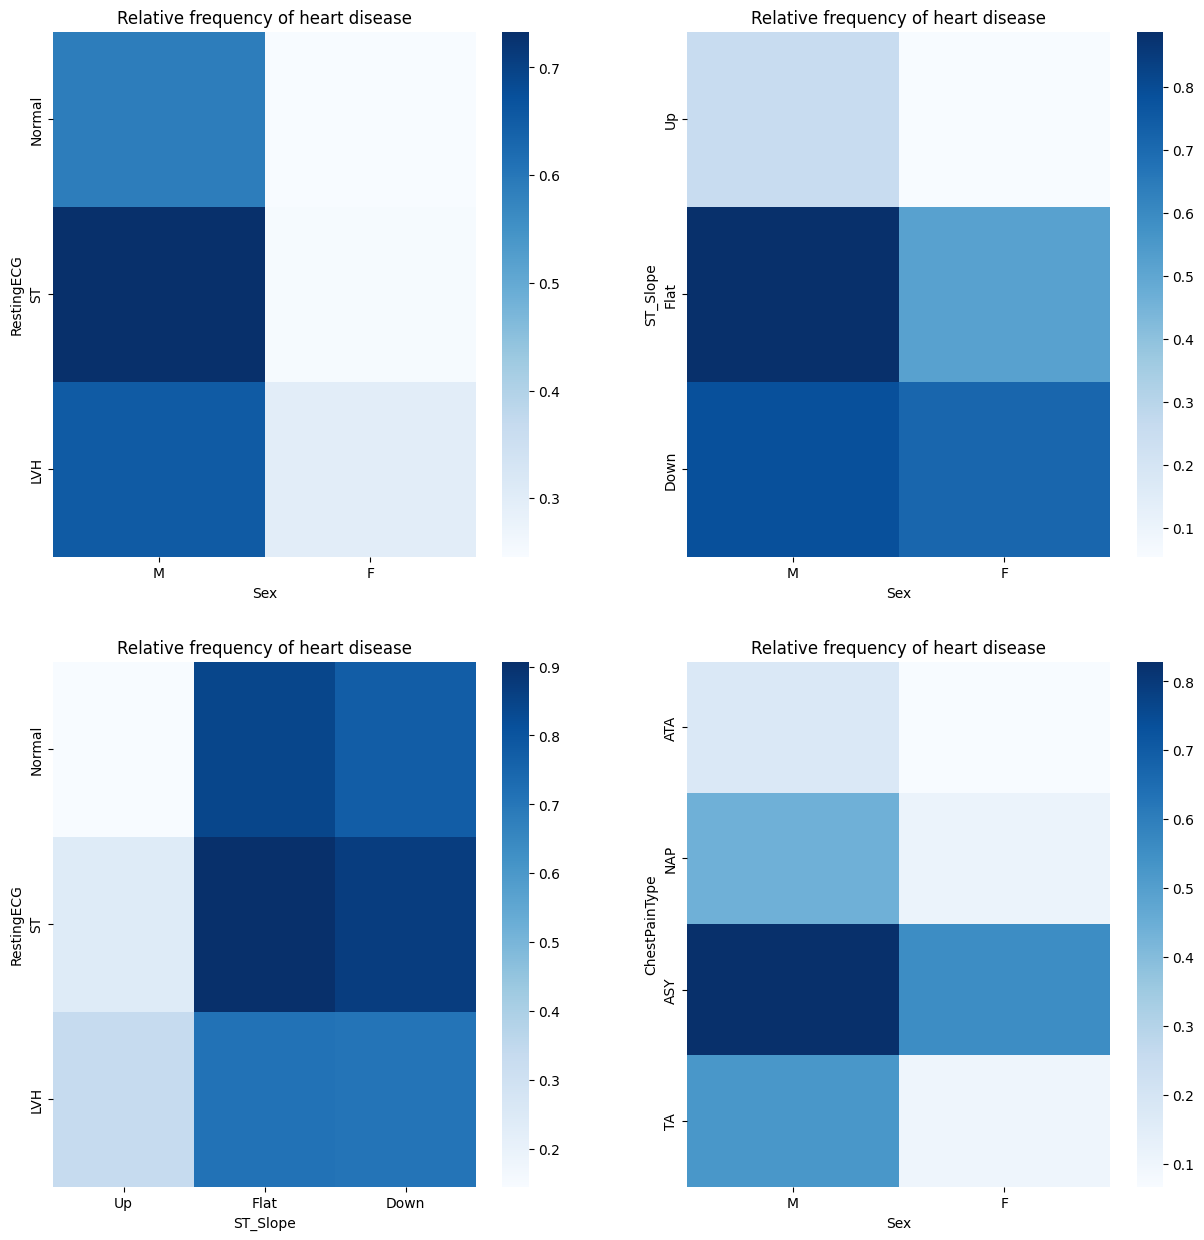

In [4]:
# Allows for bivariate analysis on heart disease relative frequency
def disp_heatmap(x, y, value):
    # data shape- # categories in x by # categories in y
    # indexes are x categories and columns are y categories
    heat_df = pd.DataFrame(data=np.zeros((len(heart_data[x].unique()), len(heart_data[y].unique()))), index = heart_data[x].unique(), columns = heart_data[y].unique())
    count_df = heat_df.copy()
    # increment corresponding cell in df each time there is an instance of heart disease in the dataset falling under those two categories
    for i, val in enumerate(heart_data[x]):
        heat_df.loc[val, heart_data.loc[i, y]] += heart_data.loc[i, value] # may add zero or one
        count_df.loc[val, heart_data.loc[i, y]] += 1
    # convert frequencies in heat_df to relative frequencies by dividing by total count
    for col in heat_df:
        heat_df[col] = heat_df[col] / count_df[col]
    sns.heatmap(heat_df, cmap='Blues');
    plt.xlabel(y)
    plt.ylabel(x)
    plt.title('Relative frequency of heart disease')

# 4 heatmaps exploring relationships between different categorical variables
plt.figure(figsize = (15, 15))
plt.subplot(2, 2, 1)
disp_heatmap('RestingECG', 'Sex', 'HeartDisease')
plt.subplot(2, 2, 2)
disp_heatmap('ST_Slope', 'Sex', 'HeartDisease')
plt.subplot(2, 2, 3)
disp_heatmap('RestingECG', 'ST_Slope', 'HeartDisease')
plt.subplot(2, 2, 4)
disp_heatmap('ChestPainType', 'Sex', 'HeartDisease')

## Bar charts

In [5]:
heart_data.groupby('RestingECG')[['HeartDisease']].sum() / heart_data.groupby('RestingECG')[['HeartDisease']].count()

,HeartDisease
RestingECG,
LVH,0.563830
Normal,0.516304
ST,0.657303


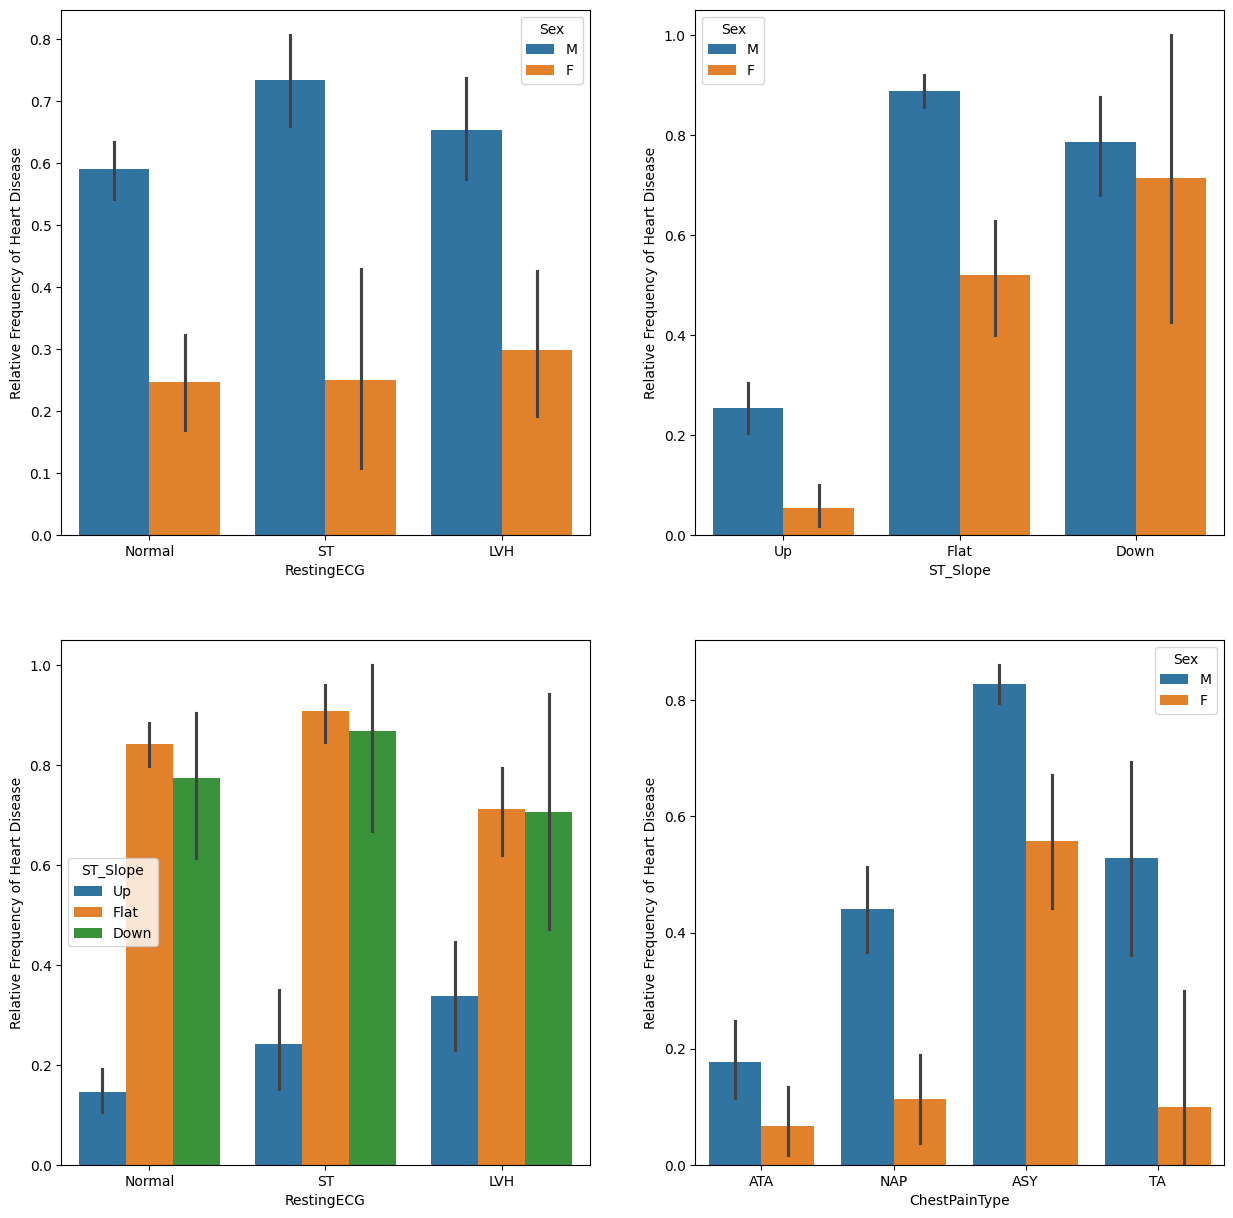

In [7]:
def categorical_plot(df, x_var, y_var, hue=None):
    sns.barplot(df, x = x_var, y = y_var, hue = hue)
    plt.ylabel('Relative Frequency of Heart Disease')
    plt.xlabel(x_var)


# same 4 plots are barcharts instead of heatmaps
plt.figure(figsize = (15, 15))
plt.subplot(2, 2, 1)
categorical_plot(heart_data, 'RestingECG', 'HeartDisease', 'Sex')
plt.subplot(2, 2, 2)
categorical_plot(heart_data, 'ST_Slope', 'HeartDisease', 'Sex')
plt.subplot(2, 2, 3)
categorical_plot(heart_data, 'RestingECG', 'HeartDisease', 'ST_Slope')
plt.subplot(2, 2, 4)
categorical_plot(heart_data, 'ChestPainType', 'HeartDisease', 'Sex')

### Observations

*   Higher proportion of men have HeartDisease in this dataset. Around 0.4 more than women.
*   When any other categorical variable was broken down by sex, men always had higher rates of heart disease
*   Higher proportion of ST Resting ECG have HeartDisease but not by much
*  Higher proportion of ASY Chest Pain Type have HeartDisease by alot more than other categories.
*  Those with up ST slope had significantly lower heart disease incidence regardless of resting ECG reading

## Histogram

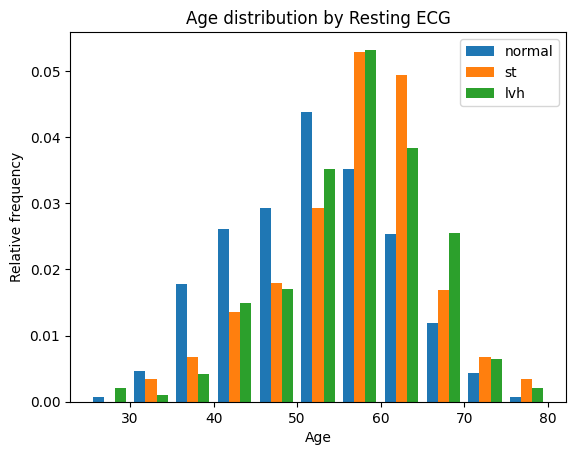

<Figure size 1200x800 with 0 Axes>

In [20]:
#['Normal', 'ST', 'LVH']
normal = heart_data[heart_data.RestingECG == 'Normal']
st = heart_data[heart_data.RestingECG == 'ST']
lvh = heart_data[heart_data.RestingECG == 'LVH']
plt.title('Age distribution by Resting ECG')
plt.xlabel('Age')
plt.ylabel('Relative frequency')
plt.hist([normal['Age'], st['Age'], lvh['Age']], bins=np.arange(25, 85, 5), density=True);
plt.legend(['normal', 'st', 'lvh']);
plt.figure(figsize=(12, 8));

## Cumulative Frequency Plot

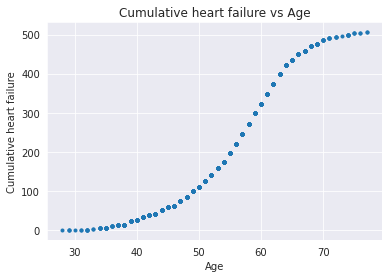

In [ ]:
cum_failure = pd.Series(np.zeros(len(heart_data)))
for i in range(len(heart_data)):
    # sums all heart failures at a particular age and younger
    cum_failure[i] = heart_data.loc[(heart_data['Age'] < heart_data.loc[i, 'Age']), 'HeartDisease'].sum()
h = pd.concat((heart_data, cum_failure), axis=1)
plt.plot(h['Age'], h[0], '.') # line plot
plt.xlabel('Age')
plt.ylabel('Cumulative heart failure')
plt.title('Cumulative heart failure vs Age')
plt.show()

# **Preprocessing**

In [21]:
heart_data.isna().sum() # clean data

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [22]:
heart_data['Age'].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

In [23]:
# Using 1.5IQR test, seems to be some outliers in quantitative variables, so we will use robust scaler
lower_bound = 54 - 1.5 * (60 - 47)
upper_bound = 54 + 1.5 * (60 - 47)
print(lower_bound, upper_bound) # min and max age are outside range

34.5 73.5


# **Ordinal Encoding and Normalization**

In [24]:
y = heart_data['HeartDisease']
heart_data.drop(columns = 'HeartDisease', inplace = True)

In [33]:
# Using sklearn's premade ordinal encoder as opposed to custom function.
cat = pd.DataFrame()
quan = pd.DataFrame()

# keep track of columns since ordinal encoder and robust scaler lose names
cat_column_list = []
quan_column_list = []
for col in heart_data:
    if heart_data[col].dtype == 'O':
        cat[col] = heart_data[col]
        cat_column_list.append(col)
    else:
        quan[col] = heart_data[col]
        quan_column_list.append(col)

# ordinal encoding of categorical variables
ordenc = OE()
cat = ordenc.fit_transform(cat)

# Robust Scaling of quantitative variables
scaler = RS()
quan = scaler.fit_transform(quan)

# recombine features
final_heart = pd.concat([pd.DataFrame(quan, columns = quan_column_list), pd.DataFrame(cat, columns = cat_column_list)], axis=1)
final_heart.head(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,-1.076923,0.5,0.704000,0.0,0.944444,-0.400000,1.0,1.0,1.0,0.0,2.0
1,-0.384615,1.5,-0.458667,0.0,0.500000,0.266667,0.0,2.0,1.0,0.0,1.0
2,-1.307692,0.0,0.640000,0.0,-1.111111,-0.400000,1.0,1.0,2.0,0.0,2.0
3,-0.461538,0.4,-0.096000,0.0,-0.833333,0.600000,0.0,0.0,1.0,1.0,1.0
4,0.000000,1.0,-0.298667,0.0,-0.444444,-0.400000,1.0,2.0,1.0,0.0,2.0
5,-1.153846,-0.5,1.237333,0.0,0.888889,-0.400000,1.0,2.0,1.0,0.0,2.0
6,-0.692308,0.0,0.149333,0.0,0.888889,-0.400000,0.0,1.0,1.0,0.0,2.0
7,0.000000,-1.0,-0.160000,0.0,0.111111,-0.400000,1.0,1.0,1.0,0.0,2.0
8,-1.307692,0.5,-0.170667,0.0,-0.222222,0.600000,1.0,0.0,1.0,1.0,1.0
9,-0.461538,-0.5,0.650667,0.0,-0.500000,-0.400000,0.0,1.0,1.0,0.0,2.0


# Training and Testing

In [34]:
x_train, x_test, y_train, y_test = tts(final_heart, y, test_size=0.2)

## Random Forest Classifier(Best Performance)

In [35]:
rfc_model = RFC()
rfc_model.fit(x_train, y_train)
rfc_pred = rfc_model.predict(x_test)
print(accuracy_score(y_test, rfc_pred))

0.8532608695652174


## K-nearest neighbors

In [39]:
knn_model = KNC()
knn_model.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)
accuracy_score(y_test, knn_pred)

0.8315217391304348

## ANN

In [37]:
neural_model = MLPC()
neural_model.fit(x_train, y_train)
neural_pred = neural_model.predict(x_test)
accuracy_score(y_test, neural_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8206521739130435